In [1]:
import sys
import os
import pandas as pd
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
sys.path.insert(0, '../')
from scale_rl.common.wandb_utils import *

/home/leehojoon/.pyenv/versions/3.9.5/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Collect Results

In [28]:
entity = 'draftrec'
project_name = 'HyperSimba_2412'
run_exp_names_to_analysis_exp_names = {
    #'simba_rr1': 'simba_utd1',
    #'simba_rr1_reset': 'simba_utd1_reset',
    #'simba_rr2_reset': 'simba_utd2_reset',
    #'simba_rr4':       'simba_utd4',
    #'simba_rr4_reset': 'simba_utd4_reset',
    #'simba_rr8':       'simba_utd8',
    #'simba_rr8_reset': 'simba_utd8_reset',
    #'hypersimba_rr1':       'simbaV2_utd1',
    #'hypersimba_rr1_reset': 'simbaV2_utd1_reset',
    #'hypersimba_rr2_reset': 'simbaV2_utd2_reset',
    #'hypersimba_rr4':       'simbaV2_utd4',
    #'hypersimba_rr4_reset': 'simbaV2_utd4_reset',
    #'hypersimba_rr8':       'simbaV2_utd8',
    #'hypersimba_rr8_reset': 'simbaV2_utd8_reset',
    #'simba_plus_rr1':       'simba_plus_utd1',
    #'simba_plus_rr1_reset': 'simba_plus_utd1_reset',
    #'simba_plus_rr2_reset': 'simba_plus_utd2_reset',
    #'simba_plus_rr4':       'simba_plus_utd4',
    #'simba_plus_rr4_reset': 'simba_plus_utd4_reset',
    #'simba_plus_rr8':       'simba_plus_utd8',
    #'simba_plus_rr8_reset': 'simba_plus_utd8_reset',
}
run_exp_names = list(run_exp_names_to_analysis_exp_names.keys())
metrics = ['avg_return', 'avg_success']

In [8]:
entity = 'draftrec'
project_name = 'Simba_2501'
run_exp_names_to_analysis_exp_names = {
    #'hypersimba_metrics':          'simbaV2_utd2',
    #'simba+_metrics':              'simba_plus_utd2',
    #'simba_rr4':                   'simba_utd4',
}
run_exp_names = list(run_exp_names_to_analysis_exp_names.keys())
metrics = ['avg_return', 'avg_success']

In [30]:
entity = 'draftrec'
project_name = 'Simba_2412'
run_exp_names_to_analysis_exp_names = {
    #'sac_simba': 'simba_utd2'
}
run_exp_names = list(run_exp_names_to_analysis_exp_names.keys())
metrics = ['avg_return', 'avg_success']

In [82]:
entity = 'draftrec'
project_name = 'Simba_2502'
run_exp_names_to_analysis_exp_names = {
    #'mujoco_1m':          'simba_utd2',
}
run_exp_names = list(run_exp_names_to_analysis_exp_names.keys())
metrics = ['avg_return', 'avg_success']

In [125]:
entity = 'joonleesky'
project_name = 'scale_rl'
run_exp_names_to_analysis_exp_names = {
    #'sac_simba_actor_256_critic_512': 'simba_utd2',
    #'ssac_dev_ar2_rr4':               'simba_utd4',
    #'ssac_dev_ar2_rr4_reset':         'simba_utd4_reset',
    #'ssac_dev_ar2_rr8':               'simba_utd8',
    #'ssac_dev_ar2_rr8_reset':         'simba_utd8_reset',
}
run_exp_names = list(run_exp_names_to_analysis_exp_names.keys())
metrics = ['avg_return', 'avg_success']
#run_eval_df = run_eval_df[run_eval_df['seed'].isin([0, 1000, 2000, 3000, 4000])]

In [31]:
runs = collect_runs(entity=entity, project_name=project_name) 
filtered_runs = filter_runs(runs, exp_names = run_exp_names, group_name='dmc_em_1m')
wandb_df = convert_runs_to_dataframe(
    runs = filtered_runs, 
    run_exp_name_to_analysis_exp_name=run_exp_names_to_analysis_exp_names
)
wandb_df = wandb_df[wandb_df.apply(lambda row: 'finished' in str(row['run']), axis=1)]
run_eval_df = convert_wandb_df_to_eval_df(wandb_df, metrics)
run_eval_df

100%|██████████| 210/210 [01:42<00:00,  2.04it/s]


,exp_name,env_name,seed,metric,env_step,value
0,simba_utd2,walker-run,9000,avg_return,0.0,18.039360
1,simba_utd2,walker-run,9000,avg_return,100000.0,611.294612
2,simba_utd2,walker-run,9000,avg_return,200000.0,667.102886
3,simba_utd2,walker-run,9000,avg_return,300000.0,719.970669
4,simba_utd2,walker-run,9000,avg_return,400000.0,687.587567
...,...,...,...,...,...,...
4615,simba_utd2,acrobot-swingup,0,avg_success,600000.0,0.000000
4616,simba_utd2,acrobot-swingup,0,avg_success,700000.0,0.000000
4617,simba_utd2,acrobot-swingup,0,avg_success,800000.0,0.000000
4618,simba_utd2,acrobot-swingup,0,avg_success,900000.0,0.000000


In [73]:
#run_eval_df = pd.concat([eval_df, run_eval_df])
#run_eval_df = run_eval_df.drop_duplicates()
#eval_df = eval_df[eval_df['env_name'].isin(DMC_HARD + HB_LOCOMOTION_NOHAND_MINI)]
#save_eval_df(run_eval_df, directory_path='../results/scaling_full/utd')
#run_eval_df

In [4]:
eval_df = read_and_concatenate_eval_df(directory_path='../results/scaling/utd')
print(eval_df['exp_name'].unique())
eval_df

['simba_utd1_reset' 'simbaV2_utd2' 'simba_utd8' 'simbaV2_utd1'
 'simba_utd1' 'simbaV2_utd4' 'simba_utd8_reset' 'simbaV2_utd1_reset'
 'simba_utd2_reset' 'simba_utd4' 'simba_utd2' 'simbaV2_utd2_reset'
 'simbaV2_utd8_reset' 'simbaV2_utd4_reset' 'simbaV2_utd8'
 'simba_utd4_reset']


,exp_name,env_name,seed,metric,env_step,value
0,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,0.0,3.677929
1,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,100000.0,168.458138
2,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,200000.0,337.702732
3,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,300000.0,301.140735
4,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,400000.0,393.114038
...,...,...,...,...,...,...
109772,simba_utd4_reset,humanoid_stand,4000,avg_success,800000.0,0.000000
109773,simba_utd4_reset,humanoid_stand,4000,avg_success,850000.0,0.000000
109774,simba_utd4_reset,humanoid_stand,4000,avg_success,900000.0,0.000000
109775,simba_utd4_reset,humanoid_stand,4000,avg_success,950000.0,0.000000


In [34]:
#eval_df['seed'] = (
#    eval_df
#    .groupby(['exp_name', 'env_name', 'metric', 'env_step'], sort=False)
#    .cumcount()            # 0,1,2,... within each group
#    .mul(1000)             # multiply by 1000
#)

#### Visualize Results

In [5]:
from rliable import library as rly
from rliable import metrics as rly_metrics
from rliable import plot_utils as rly_plot_utils

aggregate_func = lambda x: np.array([
  rly_metrics.aggregate_iqm(x),
  rly_metrics.aggregate_median(x),
  rly_metrics.aggregate_mean(x),
  rly_metrics.aggregate_optimality_gap(x)])

In [11]:
from scale_rl.envs.mujoco import MUJOCO_ALL, MUJOCO_RANDOM_SCORE, MUJOCO_TD3_SCORE
from scale_rl.envs.dmc import DMC_EASY_MEDIUM, DMC_HARD
from scale_rl.envs.humanoid_bench import HB_LOCOMOTION_NOHAND, HB_RANDOM_SCORE, HB_SUCCESS_SCORE, HB_LOCOMOTION_NOHAND_MINI
from scale_rl.envs.myosuite import MYOSUITE_TASKS

In [12]:
def replace_hypen_to_underbar(env_name_list):
    for idx in range(len(env_name_list)):
        env_name_list[idx] = env_name_list[idx].replace('-', '_')
    return env_name_list

def replace_hyphen_in_dict_keys(old_dict):
    new_dict = {}
    for k, v in old_dict.items():
        new_key = k.replace('-', '_')  # <--- direct string replace
        new_dict[new_key] = v
    return new_dict

MUJOCO_ALL = replace_hypen_to_underbar(MUJOCO_ALL)
DMC_EM = replace_hypen_to_underbar(DMC_EASY_MEDIUM)
DMC_HARD = replace_hypen_to_underbar(DMC_HARD)
MYOSUITE_TASKS = replace_hypen_to_underbar(MYOSUITE_TASKS)
HB_LOCOMOTION_NOHAND = replace_hypen_to_underbar(HB_LOCOMOTION_NOHAND)
HB_LOCOMOTION_NOHAND_MINI = replace_hypen_to_underbar(HB_LOCOMOTION_NOHAND_MINI)

MUJOCO_RANDOM_SCORE = replace_hyphen_in_dict_keys(MUJOCO_RANDOM_SCORE)
MUJOCO_TD3_SCORE = replace_hyphen_in_dict_keys(MUJOCO_TD3_SCORE)
HB_RANDOM_SCORE = replace_hyphen_in_dict_keys(HB_RANDOM_SCORE)
HB_SUCCESS_SCORE = replace_hyphen_in_dict_keys(HB_SUCCESS_SCORE)

eval_df['env_name'] = eval_df['env_name'].str.replace('-', '_')
eval_df

,exp_name,env_name,seed,metric,env_step,value
0,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,0.0,3.677929
1,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,100000.0,168.458138
2,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,200000.0,337.702732
3,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,300000.0,301.140735
4,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,400000.0,393.114038
...,...,...,...,...,...,...
109772,simba_utd4_reset,humanoid_stand,4000,avg_success,800000.0,0.000000
109773,simba_utd4_reset,humanoid_stand,4000,avg_success,850000.0,0.000000
109774,simba_utd4_reset,humanoid_stand,4000,avg_success,900000.0,0.000000
109775,simba_utd4_reset,humanoid_stand,4000,avg_success,950000.0,0.000000


In [13]:
cur_exp_names = [
    'simba_utd1', 
    'simba_utd2', 
    'simba_utd4',
    'simba_utd8', 
    #'simba_utd1_reset', 
    #'simba_utd2_reset', 
    #'simba_utd4_reset', 
    #'simba_utd8_reset', 
    'simbaV2_utd1', 
    'simbaV2_utd2', 
    'simbaV2_utd4',
    'simbaV2_utd8', 
    #'simbaV2_utd1_reset', 
    #'simbaV2_utd2_reset', 
    #'simbaV2_utd4_reset', 
    #'simbaV2_utd8_reset', 
]
#cur_exp_names = eval_df['exp_name'].unique()
cur_exp_names

['simba_utd1',
 'simba_utd2',
 'simba_utd4',
 'simba_utd8',
 'simbaV2_utd1',
 'simbaV2_utd2',
 'simbaV2_utd4',
 'simbaV2_utd8']

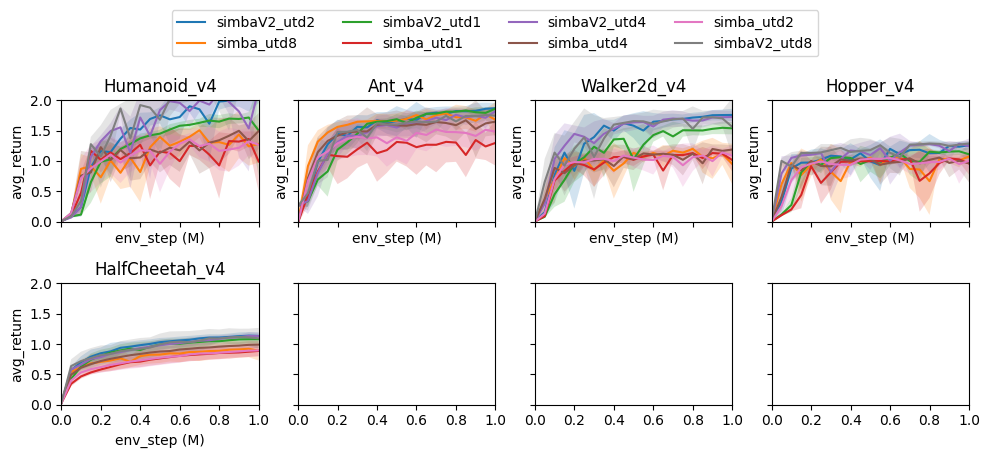

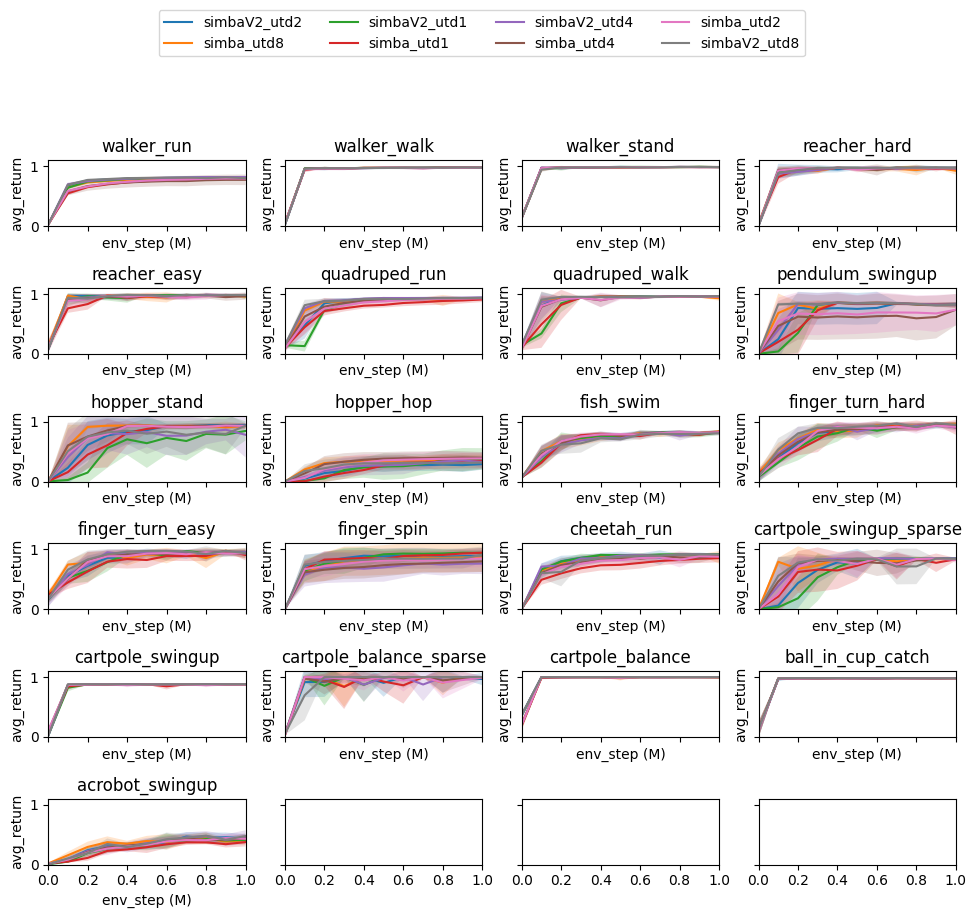

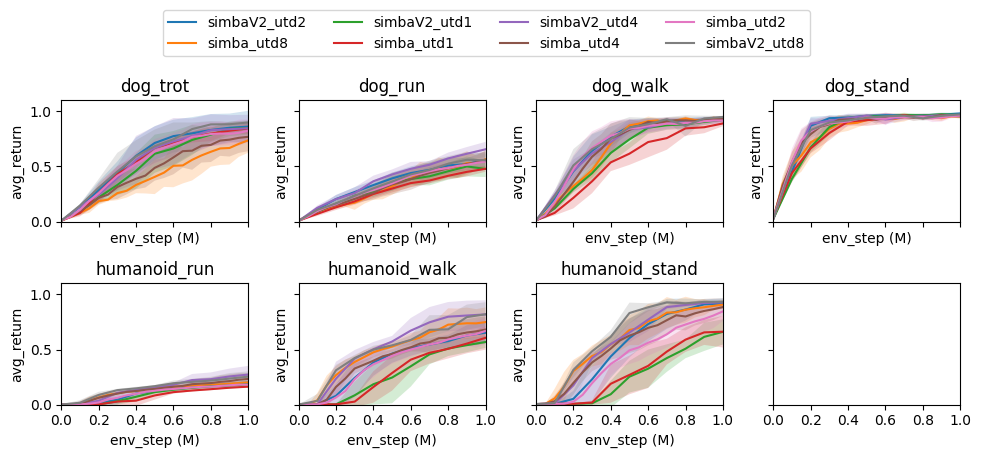

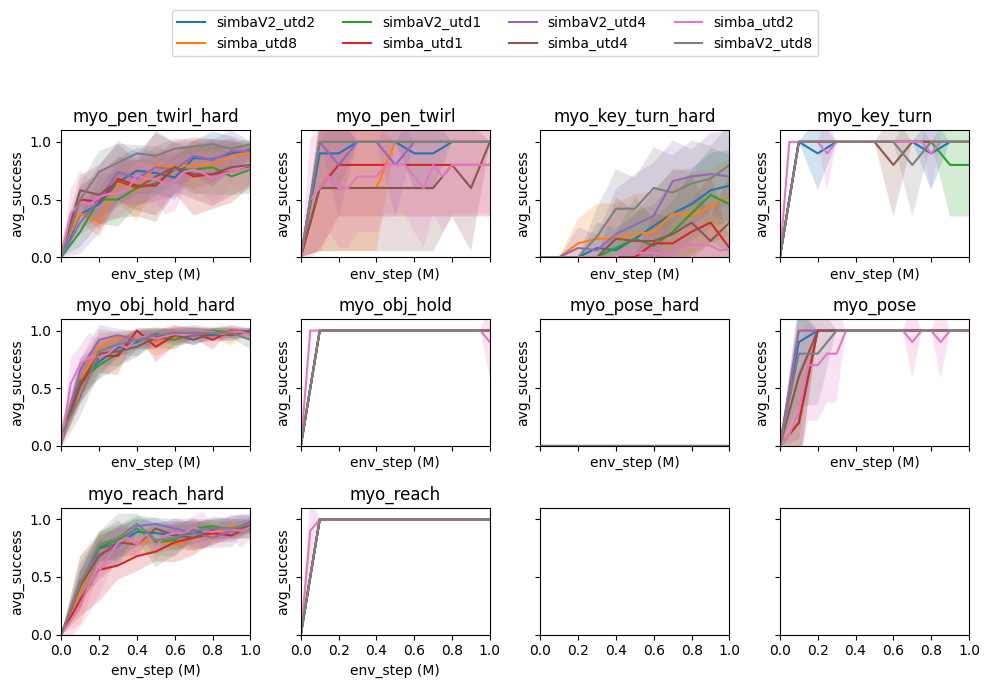

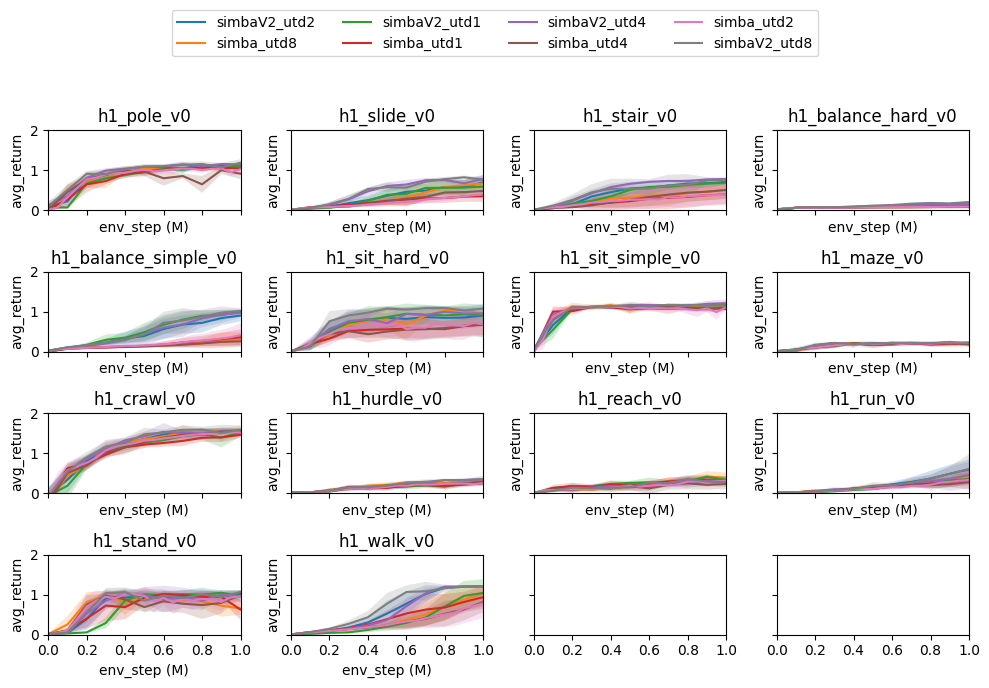

In [26]:
all_metric_mats = defaultdict(list)

for env_type in ['MUJOCO', 'DMC_EM', 'DMC_HARD', 'MYOSUITE', 'HB_LOCOMOTION_NOHAND']:
    # ['MUJOCO', 'DMC_EM', 'DMC_HARD', 'MYOSUITE', 'HB_LOCOMOTION_NOHAND']:
    if env_type == "MUJOCO":
        env_list = MUJOCO_ALL
        env_step = 1e6
        metric_type = "avg_return"
        plot_height = 4
        y_lim_max = 2.0
    
    elif env_type == "DMC_EM":
        env_list = DMC_EASY_MEDIUM
        env_step = 1e6
        metric_type = "avg_return"
        plot_height = 8
        y_lim_max = 1.1

    elif env_type == 'DMC_HARD':
        env_list = DMC_HARD
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=4 # 2.5
        y_lim_max=1.1

    elif env_type == 'MYOSUITE':
        env_list = MYOSUITE_TASKS
        env_step = 1e6
        metric_type = 'avg_success'
        plot_height=6 # 2.5
        y_lim_max=1.1

    elif env_type == 'HB_LOCOMOTION_NOHAND':
        env_list = HB_LOCOMOTION_NOHAND
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=6 # 2.5
        y_lim_max=2.0

    elif env_type == 'HB_LOCOMOTION_NOHAND_MINI':
        env_list = HB_LOCOMOTION_NOHAND_MINI
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=6 # 2.5
        y_lim_max=2.0

    # Filter eval_df for current environment set and experiments
    _eval_df = eval_df[eval_df["env_name"].isin(env_list)]
    _eval_df = _eval_df[_eval_df["exp_name"].isin(cur_exp_names)]

    if env_type == 'MUJOCO':
        _eval_df = normalize_score_with_random_and_base_score(
            _eval_df, 
            MUJOCO_RANDOM_SCORE,
            MUJOCO_TD3_SCORE,
        )

    elif env_type in ['DMC_EM', 'DMC_HARD']:
        _eval_df.loc[:, 'value'] /= 1000.0

    elif env_type == 'HB_LOCOMOTION_NOHAND':
        _eval_df = normalize_score_with_random_and_base_score(
            _eval_df, 
            HB_RANDOM_SCORE,
            HB_SUCCESS_SCORE,
        )

    elif env_type == 'HB_LOCOMOTION_NOHAND_MINI':
        _eval_df = normalize_score_with_random_and_base_score(
            _eval_df, 
            HB_RANDOM_SCORE,
            HB_SUCCESS_SCORE,
        )

    # (Optional) plot metric history for each environment in this env_type
    plot_metric_history_per_env(
        _eval_df,
        num_plots_per_row=4,
        metric=metric_type,
        x_lim_max=env_step,
        y_lim_max=y_lim_max,
        plot_width=10,
        plot_height=plot_height,
        y_label=metric_type,
    )

    # Generate metric matrix dictionary for this env_type
    _metric_matrix_dict = generate_metric_matrix_dict(
        _eval_df, env_step=env_step, metric_type=metric_type
    )

    # Collect these matrices into all_metric_mats
    for exp_name, mat in _metric_matrix_dict.items():
        all_metric_mats[exp_name].append(mat)


In [27]:
metric_matrix_dict = {}
for exp_name, mats_list in all_metric_mats.items():
    # Find the minimum number of seeds among all matrices in mats_list
    min_num_seeds = min(mat.shape[1] for mat in mats_list)
    
    # Slice each matrix to keep only the first min_num_seeds columns
    mats_sliced = [mat[:, :min_num_seeds] for mat in mats_list]
    
    # Concatenate vertically
    # Resulting shape: [sum_of_envs_across_env_types, min_num_seeds]
    metric_matrix_dict[exp_name] = np.concatenate(mats_sliced, axis=0)

aggregate_scores = {}
aggregate_score_cis= {}

# Loop over each experiment (key) separately
for exp_name, mat in metric_matrix_dict.items():
    # We pass a small dict with just this experiment's data
    single_exp_dict = {exp_name: mat}
    
    # Compute interval estimates for only this experiment
    single_scores, single_cis = rly.get_interval_estimates(
        single_exp_dict,
        aggregate_func,  # e.g. rly.aggregate_iqm or custom
        reps=10000
    )
    
    # Store the result back into all_agg_scores, all_agg_cis
    # single_scores[exp_name] is something like [IQM, Median, Mean, Optimality Gap]
    aggregate_scores[exp_name] = single_scores[exp_name]
    aggregate_score_cis[exp_name] = single_cis[exp_name]

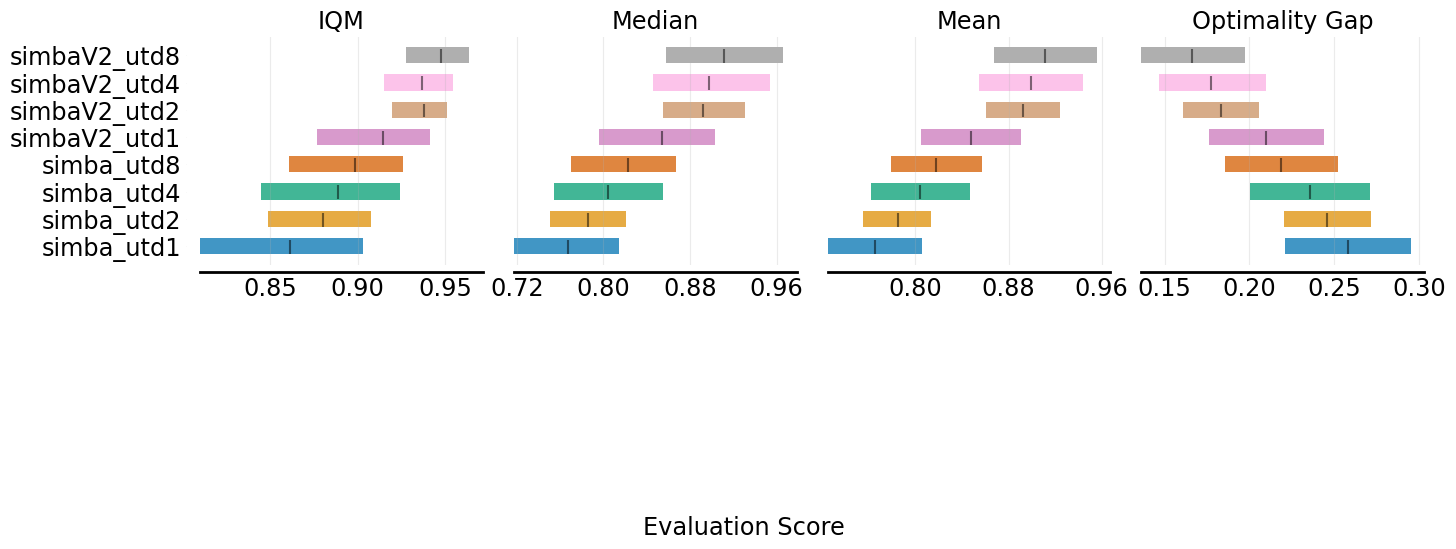

In [28]:
fig, axes = rly_plot_utils.plot_interval_estimates(
    aggregate_scores, aggregate_score_cis,
    metric_names=['IQM', 'Median', 'Mean', 'Optimality Gap'],
    algorithms=cur_exp_names,
    xlabel_y_coordinate=-0.8,
    xlabel='Evaluation Score',
)

In [29]:
names = [
    'simba_utd1', 
    'simba_utd2', 
    'simba_utd4',
    'simba_utd8', 
    #'simba_utd1_reset', 
    #'simba_utd2_reset', 
    #'simba_utd4_reset', 
    #'simba_utd8_reset', 
    'simbaV2_utd1', 
    'simbaV2_utd2', 
    'simbaV2_utd4',
    'simbaV2_utd8', 
    #'simbaV2_utd1_reset', 
    #'simbaV2_utd2_reset', 
    #'simbaV2_utd4_reset', 
    #'simbaV2_utd8_reset', 
    #'simba_plus_utd2', 
    #'simba_plus_utd4',
    #'simba_plus_utd8', 
]

for name in cur_exp_names:

#for name in aggregate_scores.keys():
    score = aggregate_scores[name][2]
    lower = aggregate_score_cis[name][0][2]
    seeds = metric_matrix_dict[name].shape[1]
    print(seeds, name, round(score, 3), round((score-lower), 3))

5 simba_utd1 0.765 0.041
10 simba_utd2 0.785 0.029
5 simba_utd4 0.804 0.042
5 simba_utd8 0.818 0.039
5 simbaV2_utd1 0.848 0.043
10 simbaV2_utd2 0.892 0.032
5 simbaV2_utd4 0.899 0.045
5 simbaV2_utd8 0.911 0.044
